# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a staged implementation is presented, as is required to successfully complete this project. No additional code is required and this is a self contained notebook.

> **Note**: An Html version of the notebook is available in the same folder

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
import numpy as np
from collections import Counter
import csv
import matplotlib.ticker as ticker
import cv2


# TODO: Fill this in based on where you saved the training and testing data
# Training testing and validation sets have been provided in the zip file provided
# in the Project materials so I have not split the data myself
# Set File Names

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

# Open files

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Create Feature and label Arrays

(X_train, y_train) = (train['features'], train['labels'])
(X_valid, y_valid) = (valid['features'], valid['labels'])
(X_test, y_test) = (test['features'], test['labels'])

In [2]:
# Check that data set is not empty
assert(len(X_train) != 0)
assert(len(X_valid) != 0)
assert(len(X_test) != 0)
# Check if data set is sane and labels and features are the same size
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The Pickle data set is loaded and checked for sanity. Subsequent cells describe the data exploration by means of text as well as illustrative images wherever applicable.
For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.bincount(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations are shown in the notebook.
%matplotlib inline

## Class strength
A fundamental property of training data should be a balanced distribution of points in every class. We have a total of 43 classes (labels)

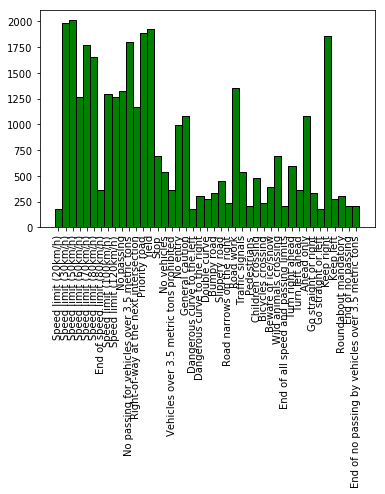

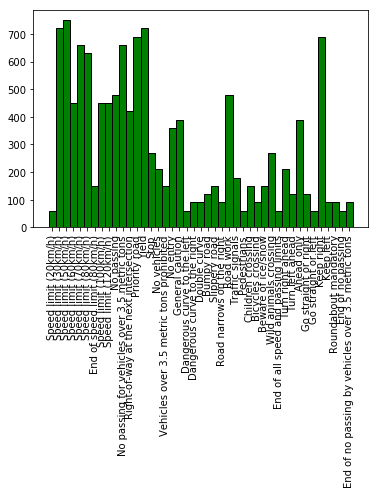

In [6]:
# Plot Class strength for each label type
# Load the csv file mapping class index to Name for better visualization
ifile = open('signnames.csv','rt')
reader = csv.reader(ifile)
indices,texts = zip(*list(reader)[1:])
def plot_data(data):
    values = np.bincount(data)
    indexes = np.arange(len(values))
    width=1
    plt.bar(indexes, values, width,color='g',edgecolor='black')
    plt.xticks(indexes , texts, rotation = 'vertical')
    plt.show()

# Plot both training and test data sets to determine the class distribution
plot_data(y_train)
plot_data(y_test)

## Conclusion
We see that certain classes are over represented and others are under-represented in our data set. This kind of a distribution might result in biasing our network unfairly. Artificially generated data should be added to the under-represented classes

# Grayscale Conversion and normalization
For a good Implementation a normalized data set is much better than a non normalized data set. 

In [7]:
# Create temporary variables to store original unnormalized images
X_train_rgb = X_train
X_test_rgb = X_test
X_valid_rgb = X_valid


# Converting the data to grayscale
X_train_grayscale = np.sum(X_train/3, axis=3, keepdims=True)
X_test_grayscale = np.sum(X_test/3, axis=3, keepdims=True)
X_valid_grayscale = np.sum(X_valid/3, axis=3, keepdims=True)

# Assigning grayscale values to the original variables
X_train = X_train_grayscale
X_test = X_test_grayscale
X_valid = X_valid_grayscale

## Normalization Equation
$$x''' = (b-a)\frac{x - \min{x}}{\max{x} - \min{x}} + a$$

Mean before Normalization 82.677589037


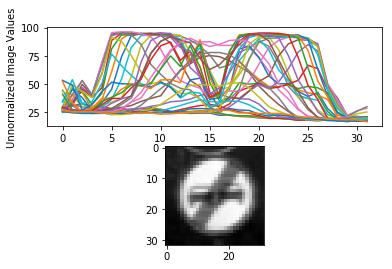

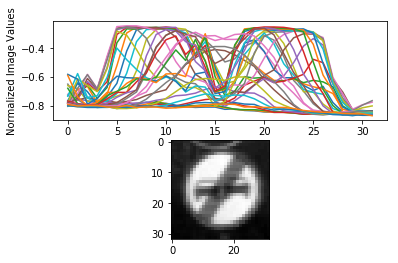

( -0.971241830065 1.0 )
Mean after Normalization -0.351548321278


In [8]:
# Print Mean before and after normalization
print('Mean before Normalization', np.mean(X_train))

b = 1
a = -1
min_val = 0.
max_val = 255.


X_normal_train = (b-a)*(X_train - min_val)/(max_val - min_val) + a
X_normal_test = (b-a)*(X_test - min_val)/(max_val - min_val) + a
X_normal_valid = (b-a)*(X_valid - min_val)/(max_val - min_val) + a

plt.figure(1)
plt.subplot(211)
plt.plot(X_train[25].squeeze())
plt.ylabel('Unnormalized Image Values')
plt.subplot(212)
plt.imshow(X_train[25].squeeze(),cmap='gray')
plt.show()

plt.figure(2)
plt.subplot(211)
plt.plot(X_normal_train[25].squeeze())
plt.ylabel('Normalized Image Values')
plt.subplot(212)
plt.imshow(X_normal_train[25].squeeze(),cmap='gray')
plt.show()

print ('(', np.min(X_normal_train), np.max(X_normal_train),')')
print ('Mean after Normalization', np.mean(X_normal_train))

## Conclusion
We have successfully normalized the data in the range (-1,1)


## Data Distribution
Label data should be plotted to check for distribution of labels to check for requirement of shuffling

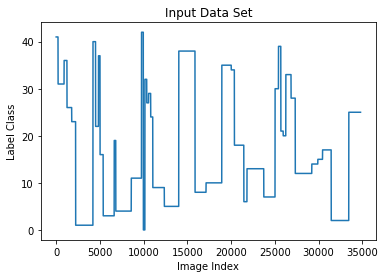

In [9]:
plt.plot(y_train)
plt.xlabel('Image Index')
plt.ylabel('Label Class')
plt.title('Input Data Set')

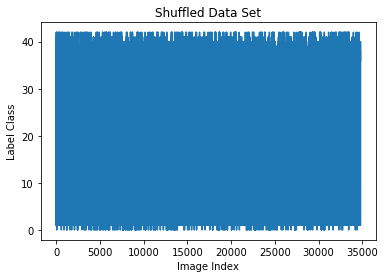

In [10]:
# Shuffle the data once
from sklearn.utils import shuffle
X_normal_train,y_train = shuffle(X_normal_train,y_train)
plt.plot(y_train)
plt.xlabel('Image Index')
plt.ylabel('Label Class')
plt.title('Shuffled Data Set')

## Conclusion
The Large number of horizontal edges in the data indicates that the data is sorted by class labels. All the labels of one type are clustered together. We will need to shuffle this data during training for better results

# Visualization interpretation
The Visualization leads to the following interpretations:
    * Speed limit inputs are over represented in both training and test sets and would bias the classifier. This is not a desirable outcome so some balancing of data needs to be achieved. Under-represented classes should be oversampled by adding points to the training set that are mutated versions of the input set.
    * Data was of int type in range 0,255 on three axis(r,g,b). It was converted to grayscale and floating point range between (-1,1)
    * Data was found to be clustered by class labels. Data was shuffled to represent uniformed distribution. We should reshuffle the data during the training operation.
    

## Class oversampling
As discovered in the data visualization step, under represented classes should be oversampled/supersampled with random mutations of the input data

In [11]:
# Function to randomly translate an image
def random_translate(img):
    img_rows,img_columns = img.shape[0],img.shape[1]
    
    # Pick Random translations in x and 
    dx = np.random.randint(-4,4,2)
    dy = np.random.randint(-4,4,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(img_rows,img_columns))
    
    dst = dst[:,:,np.newaxis]
    
    return dst



In [12]:
def random_scaling(img):   
    img_rows,img_columns = img.shape[0],img.shape[1]

    # transform limits
    scale_factor = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[scale_factor,scale_factor],[rows-scale_factor,scale_factor],[scale_factor,cols-scale_factor],[rows-scale_factor,cols-scale_factor]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst


In [13]:
# input_indices = []
# output_indices = []
# for class_n in range(n_classes):
#     print(class_n, ': ', end='')
#     class_indices = np.where(y_train == class_n)
#     n_samples = len(class_indices[0])
#     min_class_size = 800
#     if n_samples < min_class_size:
#         for i in range(min_class_size - n_samples):
#             input_indices.append(class_indices[0][i%n_samples])
#             output_indices.append(X_normal_train.shape[0])
#             new_img = X_normal_train[class_indices[0][i % n_samples]]
#             new_img = random_translate(random_scaling(new_img))
#             X_normal_train = np.concatenate((X_normal_train, [new_img]), axis=0)
#             y_train = np.concatenate((y_train, [class_n]), axis=0)
#             if i % 50 == 0:
#                 print('|', end='')
#             elif i % 10 == 0:
#                 print('-',end='')
#     print('')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

This section has been completed during the data visualization steps. Proper explanation has also been provided. As a summary, the following actions have been performed to prepare the dataset:
    * Conversion to Grayscale
    * Normalization to (-1,1)
    * Shuffling of data set

In [14]:
# Import tensorflow and define batch size and epochs
import tensorflow as tf
import numpy as np

EPOCHS = 10
BATCH_SIZE = 100

### Model Architecture

In [15]:
# Create Convolutional Layer
## Parameters
import cv2
def create_convolutional_layer(
    input_features,
    input_depth,
    output_depth,
    filter_width,
    filter_height,
    desired_strides,
    desired_padding,
    mu,
    sigma,
    ):
    biases = tf.Variable(tf.random_normal([output_depth]))
    weights = tf.Variable(tf.truncated_normal(shape=(filter_width, filter_height, input_depth,
                          output_depth), mean=mu, stddev=sigma))
    conv_layer = tf.nn.conv2d(input_features, weights, strides=desired_strides,
                              padding=desired_padding) + biases
    return conv_layer


In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def traffic_sign_classifier_network(x):
    with tf.device('/gpu:0'):
        # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
        mu = 0
        sigma = 0.1
        desired_padding_valid = 'VALID'
        desired_padding_same = 'SAME'
        input_depth = 1
        
        
        # Layer 1: Convolutional. filter_size 3x3
        depth_1 = 8
        filter_shape_1 = [3,3]
        layer_1 = create_convolutional_layer(x, input_depth, depth_1, filter_shape_1[0], filter_shape_1[1], [1,1,1,1], desired_padding_valid, mu, sigma)
        # Activate Using Relu
        act_1 = tf.nn.relu(layer_1)
        # Pooling (2x2) Input = 30x30x8. Output = 15x15x8.
        pool_1 = tf.nn.max_pool(act_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

        # Layer 2: Convolutional. filter_size 2x2.
        depth_2 = 16
        filter_shape_2 = [2,2]
        layer_2 = create_convolutional_layer(pool_1, depth_1, depth_2, filter_shape_2[0], filter_shape_2[1], [1,1,1,1], desired_padding_valid, mu, sigma)
        # Activation using softmax
        act_2 = tf.nn.softmax(layer_2)
        # Pooling. Input = 14x14x16. Output = 7x7x16.
        pool_2 = tf.nn.max_pool(act_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
        last_pool = pool_2
        

        # Flatten to use in fully connected layers
        flat = flatten(last_pool)
        flattened_size = last_pool.shape[1]*last_pool.shape[2]*last_pool.shape[3]

        # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
        depth_fc_1 = 128
        biases_fc_1 = tf.Variable(tf.zeros(depth_fc_1))
        weights_fc_1 = tf.Variable(tf.truncated_normal(shape=(np.int32(flattened_size),depth_fc_1), mean=mu, stddev=sigma))
        fc_layer_1 = tf.matmul(flat,weights_fc_1) + biases_fc_1  
        # TODO: Activation.
        act_fc_layer_1 = tf.nn.relu(fc_layer_1)
        
        act_fc_layer_1 = tf.nn.dropout(act_fc_layer_1, 0.5)
        

        # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
        depth_fc_2 = 128
        biases_fc_2 = tf.Variable(tf.zeros(depth_fc_2))
        weights_fc_2 = tf.Variable(tf.truncated_normal(shape=(depth_fc_1,depth_fc_2), mean=mu, stddev=sigma))
        fc_layer_2 = tf.matmul(act_fc_layer_1,weights_fc_2) + biases_fc_2
        # TODO: Activation.
        act_fc_layer_2 = tf.nn.relu(fc_layer_2)
        act_fc_layer_2 = tf.nn.dropout(act_fc_layer_2, 0.5)

        # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
        depth_output = 43
        biases_output = tf.Variable(tf.zeros(depth_output))
        weights_output = tf.Variable(tf.truncated_normal(shape=(depth_fc_2,depth_output), mean=mu, stddev=sigma))
        logits = tf.matmul(act_fc_layer_2,weights_output) + biases_output

        return logits

In [ ]:
from tensorflow.contrib.layers import flatten

def LeNet2(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    with tf.device('/gpu:0'):
        
        input_depth = 1
        depth_1 = 6
        filter_shape_1 = [5,5]
        # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
        layer_1 = create_convolutional_layer(x, input_depth, depth_1, filter_shape_1[0], filter_shape_1[1], [1,1,1,1], desired_padding_valid, mu, sigma)
        # Activate Using Relu
        act1 = tf.identity(tf.nn.relu(layer_1),name='activation_1')
        tf.add_to_collection('vars',act1)


        # Pooling (2x2) Input = 30x30x8. Output = 15x15x8.
        pool_1 = tf.nn.max_pool(act_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        print("layer 1 shape:",pool_1.get_shape())

        # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
        W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma),name='Weights_1')
        x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
        b1 = tf.Variable(tf.zeros(6),name="biases_1")
        x = tf.nn.bias_add(x, b1)
        print("layer 1 shape:",x.get_shape())

        # TODO: Activation.
        x = tf.nn.relu(x)
        act1 = tf.identity(x,name='activation_1')
        tf.add_to_collection('vars',act1)

        # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
        x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        layer1 = x

        # TODO: Layer 2: Convolutional. Output = 10x10x16.
        W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name='Weights_2')
        x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
        b2 = tf.Variable(tf.zeros(16), name='biases_2')
        x = tf.nn.bias_add(x, b2)

        # TODO: Activation.
        x = tf.nn.relu(x)
        act2 = tf.identity(x,name='activation_2')
        tf.add_to_collection('vars',act2)

        # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
        x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        layer2 = x

        # TODO: Layer 3: Convolutional. Output = 1x1x400.
        W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
        x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
        b3 = tf.Variable(tf.zeros(400))
        x = tf.nn.bias_add(x, b3)

        # TODO: Activation.
        x = tf.nn.relu(x)
        layer3 = x
        
        act3 = tf.identity(x,name='activation_3')
        tf.add_to_collection('vars',act3)
        # TODO: Flatten. Input = 5x5x16. Output = 400.
        layer2flat = flatten(layer2)
        print("layer2flat shape:",layer2flat.get_shape())

        # Flatten x. Input = 1x1x400. Output = 400.
        xflat = flatten(x)
        print("xflat shape:",xflat.get_shape())

        # Concat layer2flat and x. Input = 400 + 400. Output = 800
        x = tf.concat([xflat, layer2flat], 1)
        print("x shape:",x.get_shape())

        # Dropout
        x = tf.nn.dropout(x, keep_prob)

        # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
        W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
        b4 = tf.Variable(tf.zeros(43))    
        logits = tf.identity(tf.add(tf.matmul(x, W4), b4),name="logits")
        tf.add_to_collection('vars',logits)

        # TODO: Activation.
        #x = tf.nn.relu(x)

        # TODO: Layer 5: Fully Connected. Input = 120. Output = 84.
        #W5 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
        #b5 = tf.Variable(tf.zeros(84)) 
        #x = tf.add(tf.matmul(x, W5), b5)

        # TODO: Activation.
        #x = tf.nn.relu(x)

        # TODO: Layer 6: Fully Connected. Input = 84. Output = 43.
        #W6 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
        #b6 = tf.Variable(tf.zeros(43)) 
        #logits = tf.add(tf.matmul(x, W6), b6)
    
        return act1,act2,act3,logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [ ]:
# Create Placeholders for training set
with tf.device('/gpu:0'):
    x = tf.placeholder(tf.float32, (None, 32, 32, 1))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, 43)
    keep_prob = tf.placeholder(tf.float32) 

In [ ]:
# Setup the Training Pipeline
rate = 0.001
with tf.device ('gpu:0'):
    act1,act2,act3,logits = LeNet2(x)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)

In [ ]:
# Evaluate the Model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
# Train the model
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_normal_train, y_train = shuffle(X_normal_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_normal_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_normal_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    # Save the Model    
    saver.save(sess, './lenet')
    saver.save(sess,'./lenet.ckpt')
    print("Model saved")

In [ ]:
# Evaluate the accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_normal_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_normal_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#reading in an image
import os

fig, axs = plt.subplots(2,4, figsize=(4, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []

for i, img in enumerate(os.listdir('my-found-traffic-signs/')):
    image = cv2.imread('my-found-traffic-signs/' + img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)

my_images = np.asarray(my_images)

my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)

my_images_normalized = (my_images_gry - 128.)/128. 


### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [ ]:
my_labels = [11, 3, 1, 12, 38, 34, 18, 25]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(my_images_normalized, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)
from textwrap import wrap

texts = [ '\n'.join(wrap(l, 12)) for l in texts ]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(my_images),6, figsize=(20, 20))
    fig.subplots_adjust(hspace = .80, wspace=.80)
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[6*i].axis('off')
        axs[6*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[6*i].set_title('input')
        for j in range(5):
            guess = my_top_k[1][i][j]
            index = np.argwhere(y_train == guess)[0]
            axs[6*i+j+1].axis('off')
            axs[6*i+j+1].imshow(X_normal_train[index].squeeze(), cmap='gray')
            axs[6*i+j+1].set_title('guess {}: {} ({:.3f})'.format(j+1,texts[guess], my_top_k[0][i][j]))

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
imageToUse = my_images_normalized[0]
plt.imshow(np.reshape(imageToUse,[32,32]), interpolation="nearest", cmap="gray")

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    outputFeatureMap([imageToUse],act1)
    plt.show()
    outputFeatureMap([imageToUse],act2)
    plt.show()
    outputFeatureMap([imageToUse],act3)
    


In [ ]:
get_activation_output(imageToUse)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 